In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [16]:
df = pd.read_csv('Electronic_sales_Sep2023-Sep2024.csv')
df.head(5)

,Customer ID,Age,Gender,Loyalty Member,Product Type,SKU,Rating,Order Status,Payment Method,Total Price,Unit Price,Quantity,Purchase Date,Shipping Type,Add-ons Purchased,Add-on Total
0,1000,53,Male,No,Smartphone,SKU1004,2,Cancelled,Credit Card,5538.33,791.19,7,2024-03-20,Standard,"Accessory,Accessory,Accessory",40.21
1,1000,53,Male,No,Tablet,SKU1002,3,Completed,Paypal,741.09,247.03,3,2024-04-20,Overnight,Impulse Item,26.09
2,1002,41,Male,No,Laptop,SKU1005,3,Completed,Credit Card,1855.84,463.96,4,2023-10-17,Express,NaN,0.00
3,1002,41,Male,Yes,Smartphone,SKU1004,2,Completed,Cash,3164.76,791.19,4,2024-08-09,Overnight,"Impulse Item,Impulse Item",60.16
4,1003,75,Male,Yes,Smartphone,SKU1001,5,Completed,Cash,41.50,20.75,2,2024-05-21,Express,Accessory,35.56


In [20]:
df['Purchase Date'] = pd.to_datetime(df['Purchase Date'])

Task 1

In [26]:
preferred_payment = df.groupby('Customer ID')['Payment Method'].agg(lambda x: x.value_counts().idxmax())

In [28]:
total_spending = df.groupby('Customer ID')['Total Price'].sum()

In [30]:
addon_spending = df.groupby('Customer ID')['Add-on Total'].sum()

In [36]:
preferred_payment.head(5), total_spending.head(5), addon_spending.head(5)

(Customer ID
 1000    Credit Card
 1002    Credit Card
 1003           Cash
 1004    Credit Card
 1005         Paypal
 Name: Payment Method, dtype: object,
 Customer ID
 1000     6279.42
 1002     5020.60
 1003       41.50
 1004       83.00
 1005    11779.11
 Name: Total Price, dtype: float64,
 Customer ID
 1000    66.30
 1002    60.16
 1003    35.56
 1004    65.78
 1005    75.33
 Name: Add-on Total, dtype: float64)

Task 2

In [42]:
shipping_income = df.groupby('Shipping Type')['Total Price'].sum()

In [47]:
product_income = df.groupby('Product Type')['Total Price'].sum()

In [49]:
df['Month'] = df['Purchase Date'].dt.to_period('M')
df['Quarter'] = df['Purchase Date'].dt.to_period('Q')
addon_monthly_revenue = df.groupby('Month')['Add-on Total'].sum()
addon_quarterly_revenue = df.groupby('Quarter')['Add-on Total'].sum()

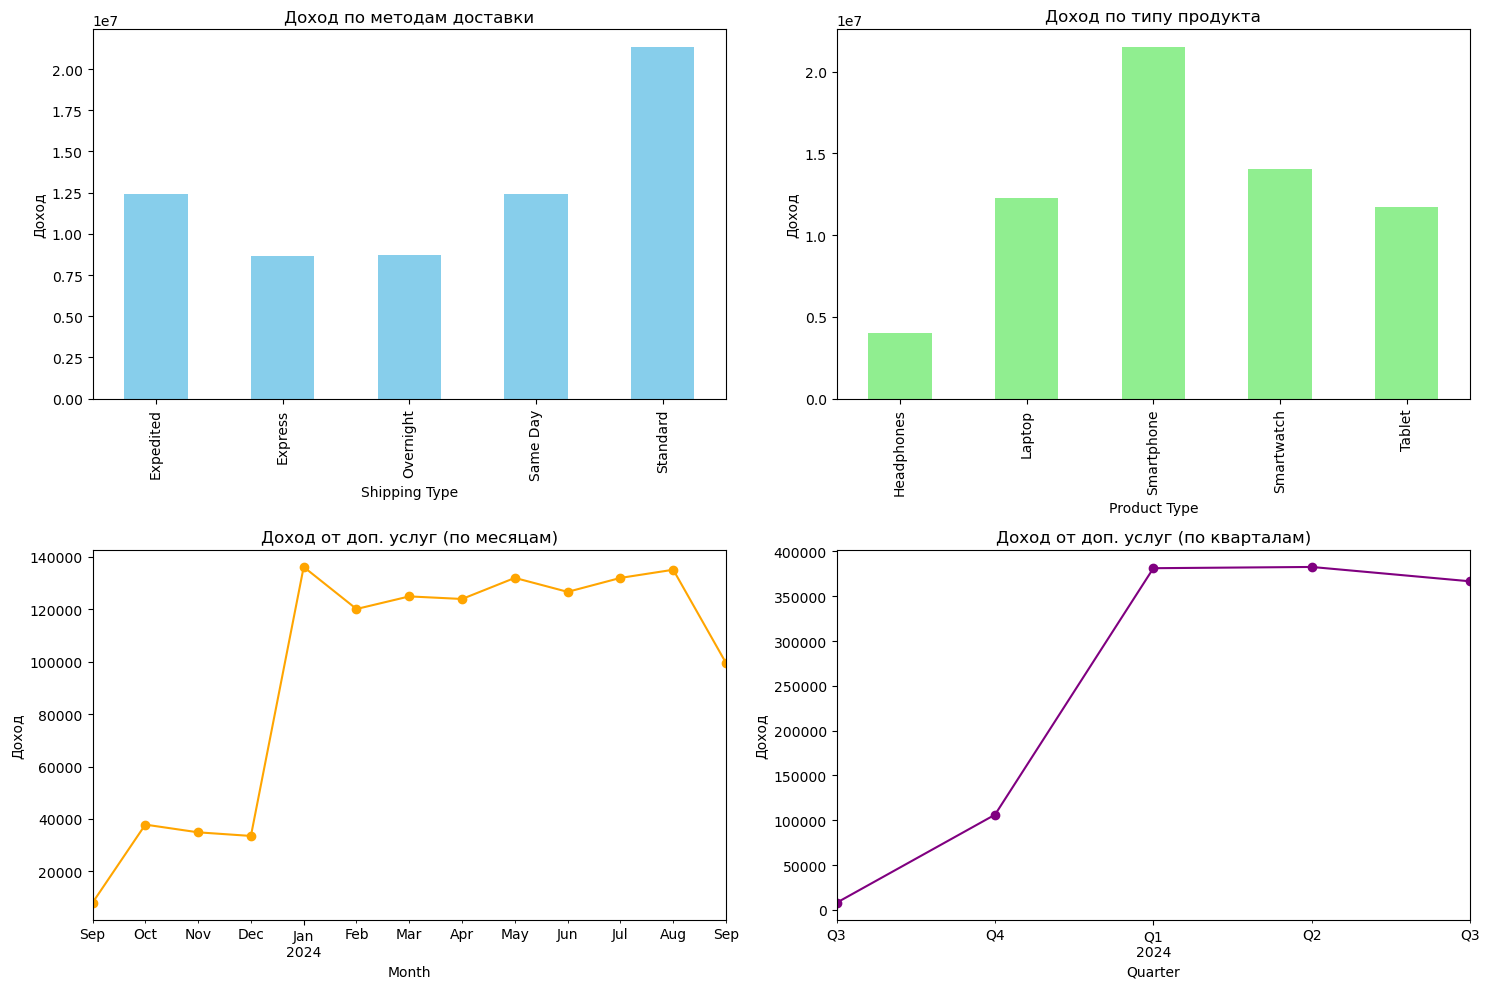

In [69]:
# Отображение данных на графиках
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# График дохода по методам доставки
shipping_income.plot(kind='bar', ax=axs[0, 0], color='skyblue', title="Доход по методам доставки")
axs[0, 0].set_ylabel("Доход")

# График дохода по типу продукта
product_income.plot(kind='bar', ax=axs[0, 1], color='lightgreen', title="Доход по типу продукта")
axs[0, 1].set_ylabel("Доход")

# График дохода от дополнительных услуг по месяцам
addon_monthly_revenue.plot(kind='line', ax=axs[1, 0], marker='o', color='orange', title="Доход от доп. услуг (по месяцам)")
axs[1, 0].set_ylabel("Доход")

# График дохода от дополнительных услуг по кварталам
addon_quarterly_revenue.plot(kind='line', ax=axs[1, 1], marker='o', color='purple', title="Доход от доп. услуг (по кварталам)")
axs[1, 1].set_ylabel("Доход")

plt.tight_layout()
plt.show()